# Proyecto Breast Cancer Wisconsin (Diagnostic) Data Set

### Descripcción

About Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## Librerias

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## DataSet

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

## Carga del Dataset

In [216]:
os.listdir("Data/")

['data.csv']

In [217]:
data_file = Path.cwd().resolve()/"Data"/"data.csv"
df_raw = pd.read_csv(data_file)
df_raw.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Tamaño del dataset

In [218]:
df_raw.shape

(569, 33)

Descripcción del data set

In [219]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

cambiar el nombre de la variable target

In [220]:
df_raw = df_raw.rename(columns={"diagnosis":"target"})

Cambiar tipo de datos obj a numericos de las demas variables diferentes a la obj

In [221]:
#df_raw. = pd.to_numeric(df_raw., errors="coerce")
#df_raw.head(5)

## Analisis Exploratorio de los datos

### Manejo de nulos

In [222]:
df_raw.isnull().sum()

id                           0
target                       0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Eliminar Datos

#### Eliminar Columnas innecesarias

In [223]:
df_raw.columns

Index(['id', 'target', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [224]:
df_raw.drop({"id","Unnamed: 32"}, axis=1, inplace=True)
df_raw.head(5)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Eliminar Nulos

In [225]:
df_raw.dropna(inplace=True)

### Convertir a numericos la variable objetivo y las demas variables categoricas

In [226]:
df_raw["target"].unique()

array(['M', 'B'], dtype=object)

In [227]:
df_raw["target"].replace(to_replace="M", value=1, inplace=True)
df_raw["target"].replace(to_replace="B", value=0, inplace=True)
df_raw["target"].head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Copia el DataSet en el DatSet processing

In [228]:
df_processing = df_raw.copy()

### Cambiar Variables categoricas a numericas

In [229]:
df_processing=pd.get_dummies(df_processing)
df_processing.head(5)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Analisis de Correlación

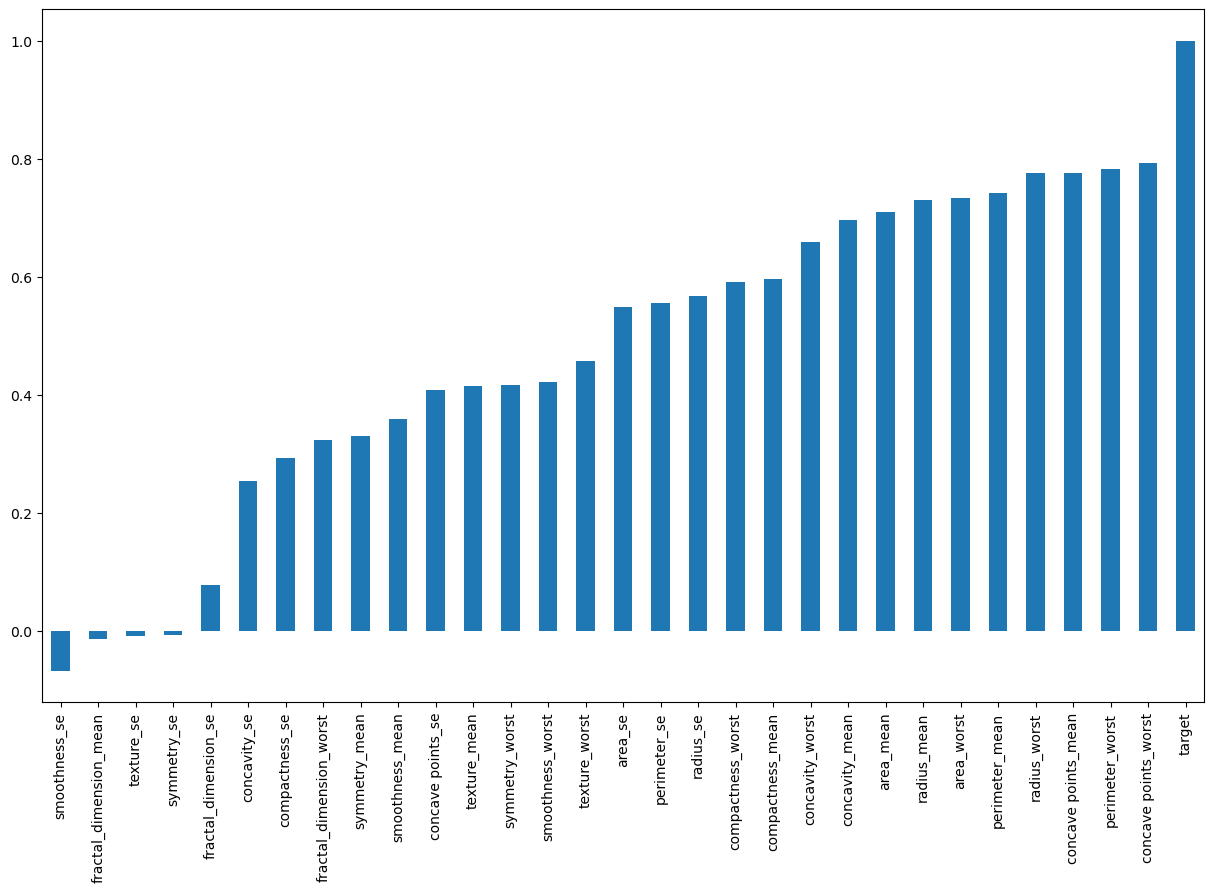

In [230]:
fig0 = plt.figure(figsize=(15,9))
df_processing.corr()["target"].sort_values(ascending=True).plot(kind="bar")
plt.show()

matrix de correlación

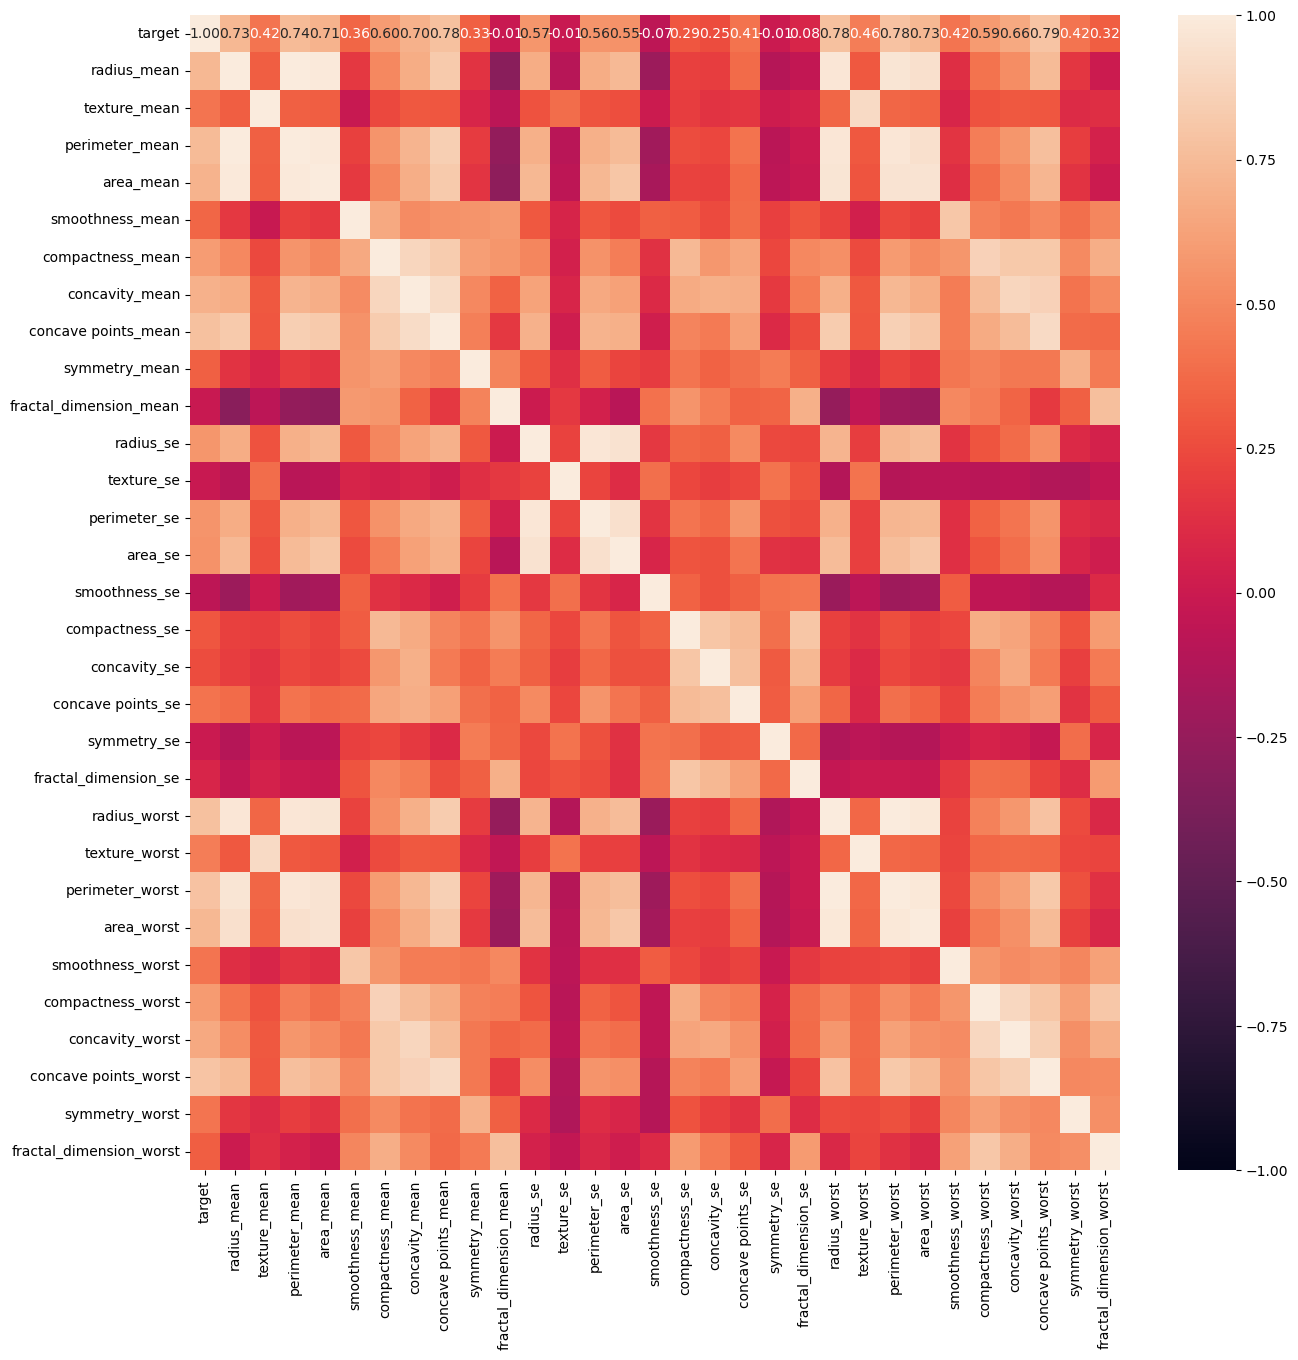

In [231]:
plt.figure(figsize=(15,15))
sns.heatmap(df_processing.corr(),annot=True, vmin=-1, vmax=1, fmt='.2f')
plt.show()

In [232]:
df_processing.corr()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Elimianr columnas que podrian no estar contribuyendo al analisis 

In [233]:
df_processing.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [234]:
df_processing.drop({'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst'}, axis=1, inplace=True)
df_processing.head(5)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [235]:
df_processing.shape

(569, 11)

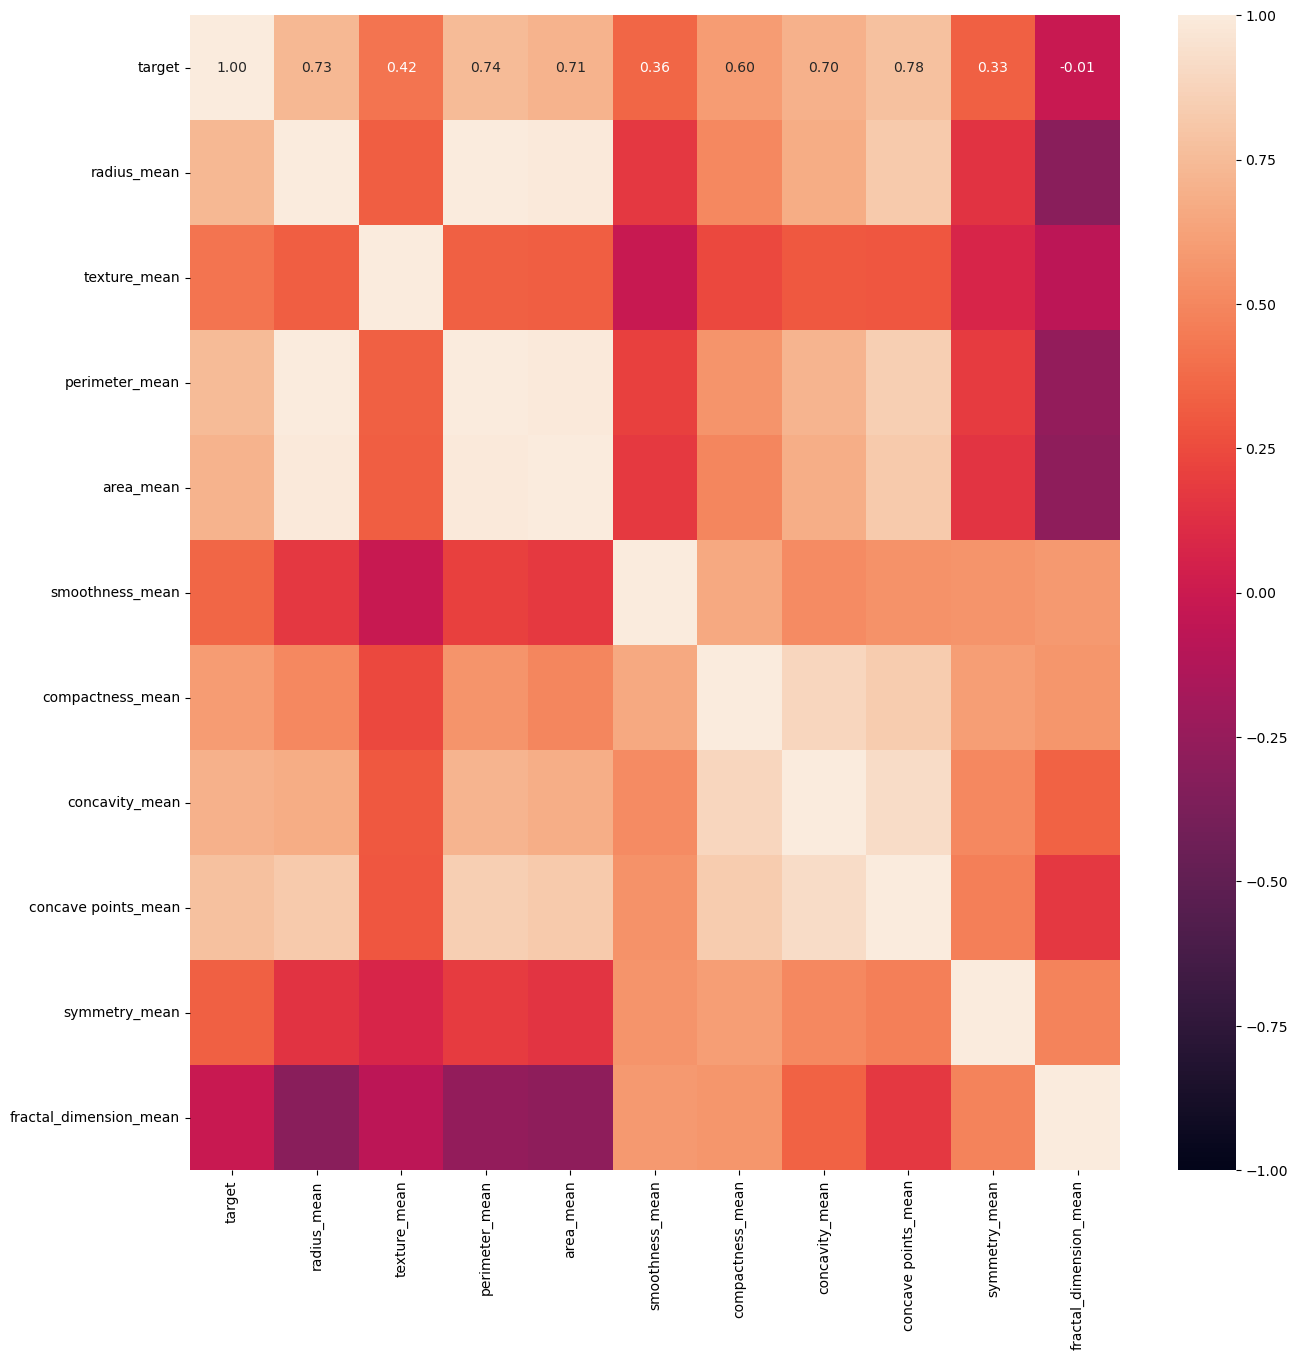

In [236]:
fig1=plt.figure(figsize=(15,15))
sns.heatmap(df_processing.corr(),annot=True, vmin=-1, vmax=1, fmt='.2f')
plt.show()

In [237]:
df_processing.corr()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


### Estadistica descriptiva

In [238]:
df_processing.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


### Visualización de datos

c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dpare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 500x500 with 0 Axes>

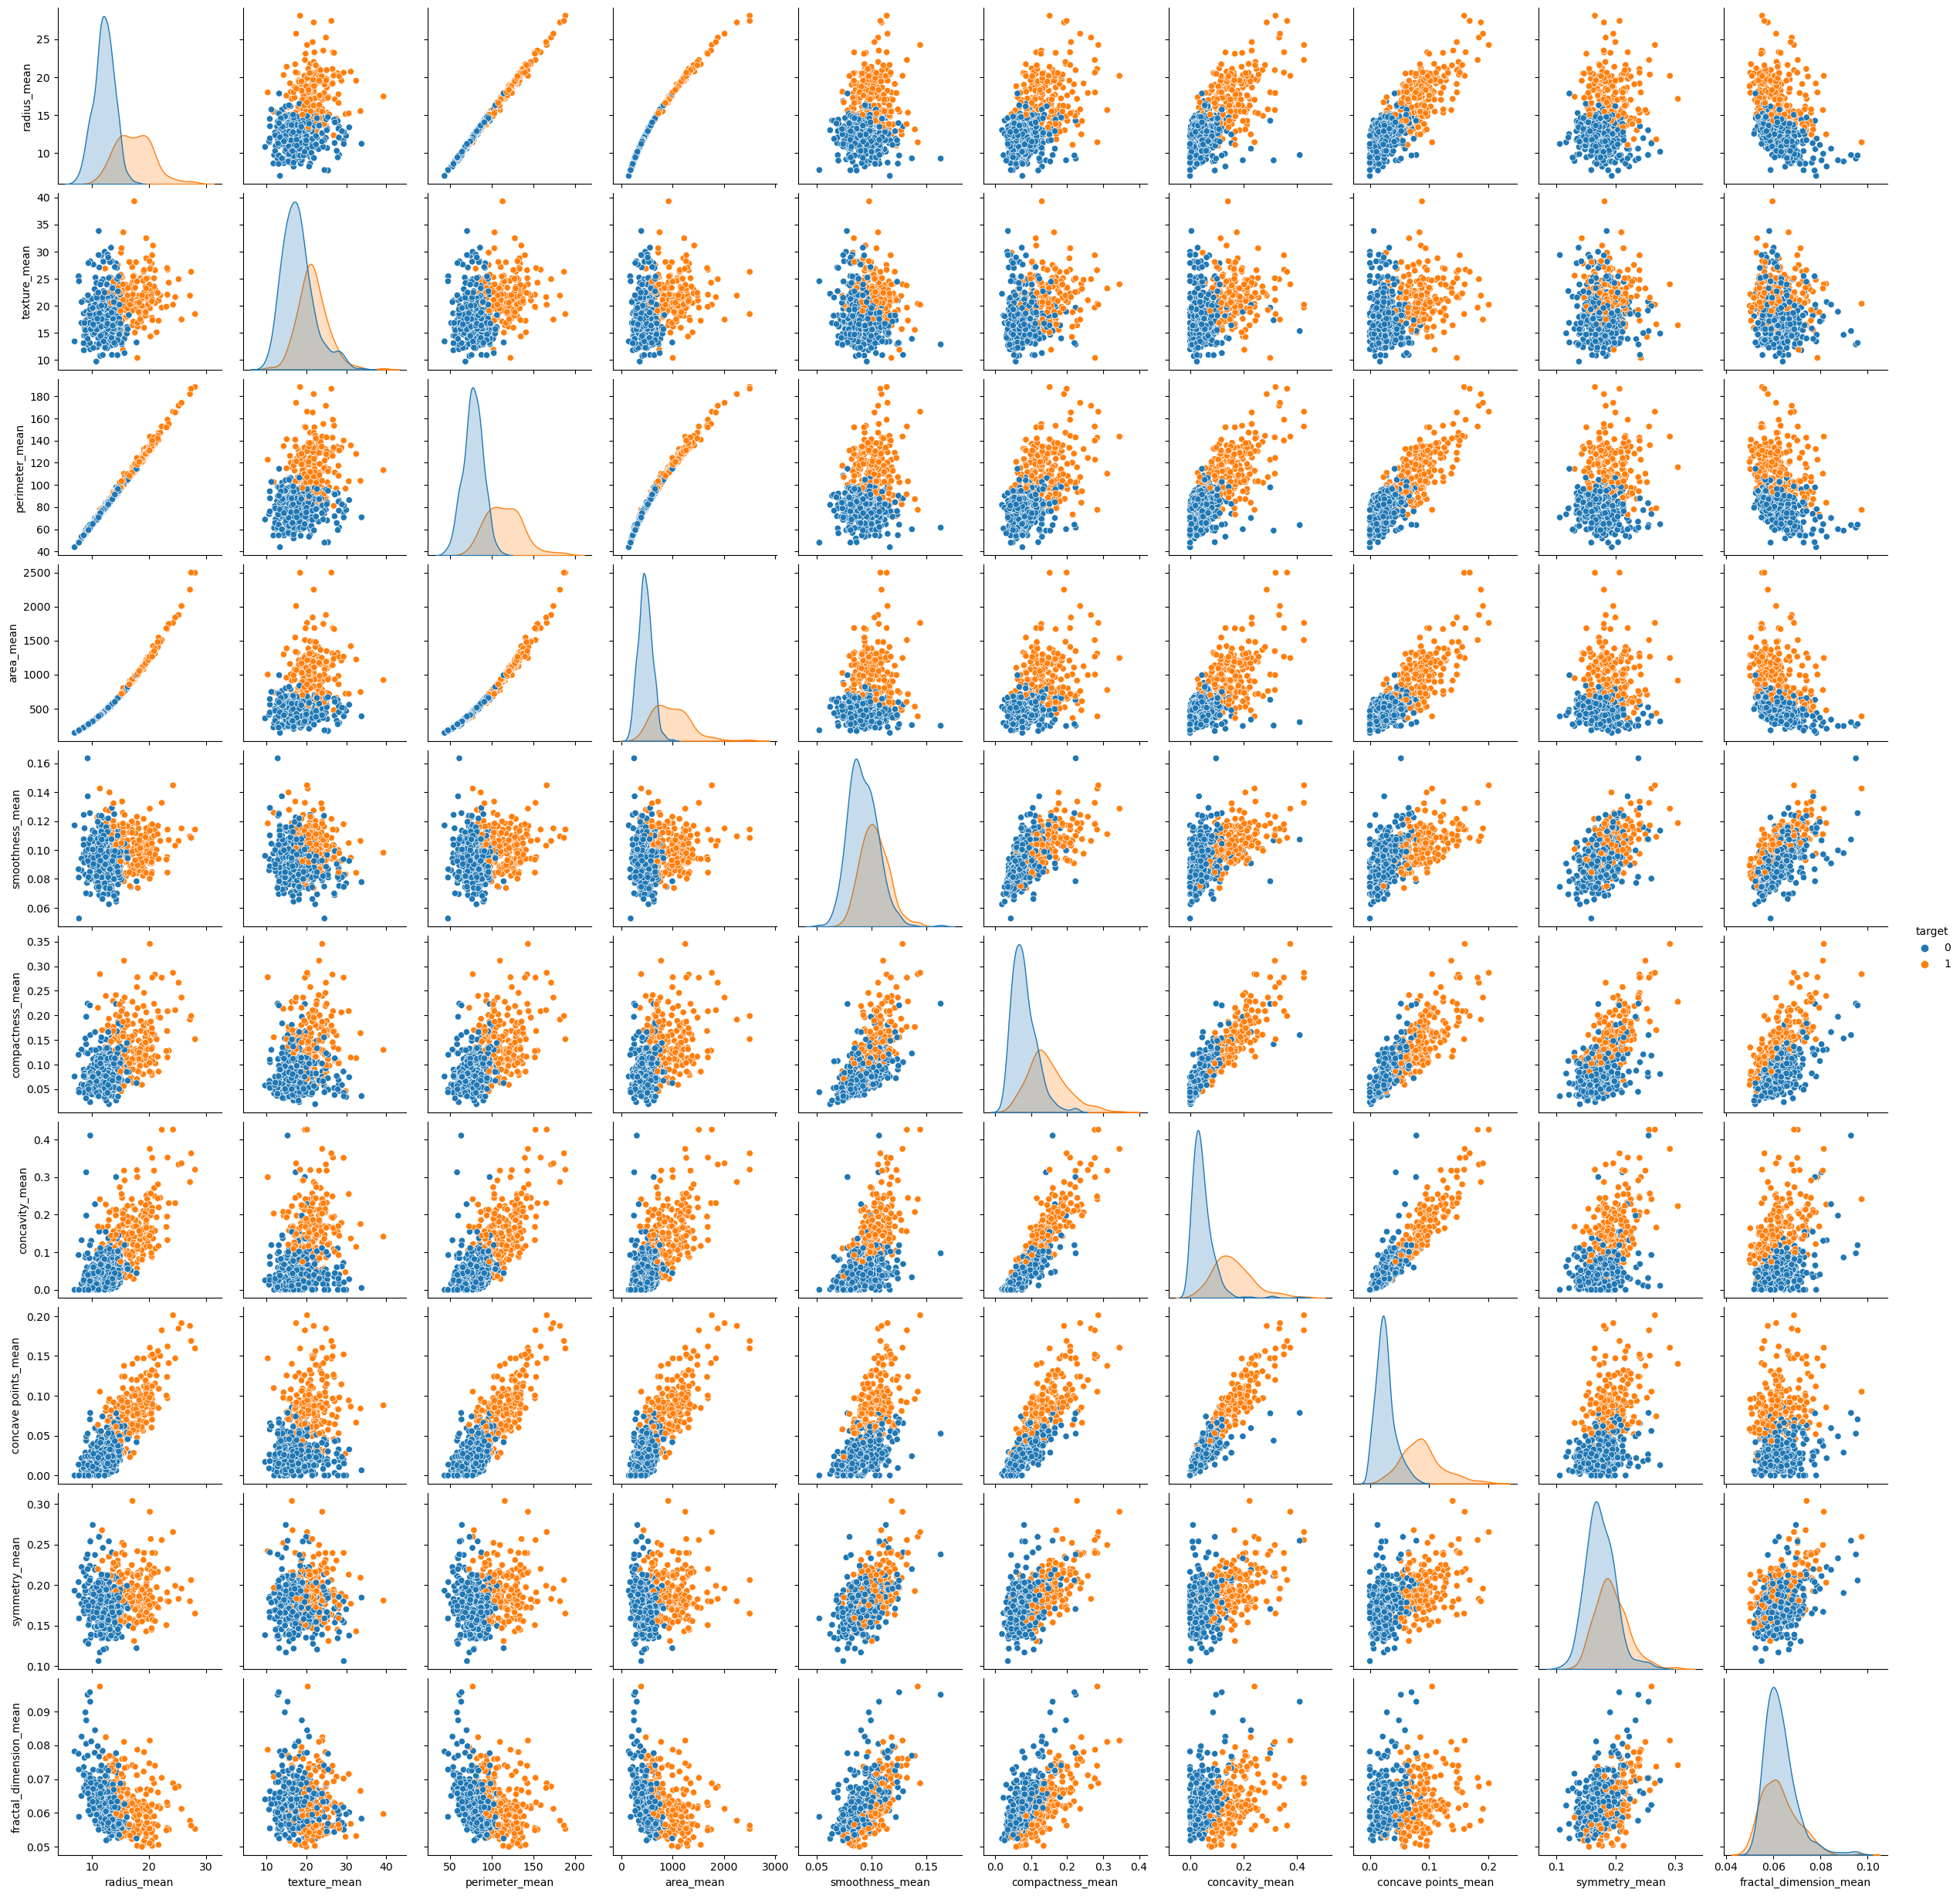

In [239]:
fig2=plt.figure(figsize=(5,5))
sns.pairplot(df_processing, hue="target")
plt.show()

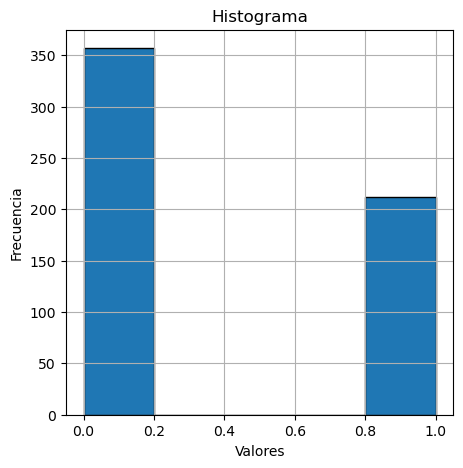

In [240]:
data = df_processing["target"]
fig3=plt.figure(figsize=(5,5))
plt.hist(data, bins=5, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Escalabilidad de los datos

In [241]:
scaler = MinMaxScaler()
df_processing_scaler = scaler.fit_transform(df_processing)

In [242]:
df_processing_scaler= pd.DataFrame(df_processing_scaler)
df_processing_scaler.columns= df_processing.columns
df_processing_scaler.head(5)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


## Generación de Algoritmo

### Entrenamiento del modelo de regresión logistica

In [243]:
#Sepracion de varible objetivo y las variables independintes
X = df_processing_scaler.drop("target", axis=1)
y = df_processing_scaler["target"].values

In [244]:
#Sepracion de datos de entremiento y tes

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [245]:
#Generación del modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [246]:
#Metricas
from sklearn import metrics
prediction_test = model.predict(X_test)
acc = round((metrics.accuracy_score(y_test, prediction_test)*100),2)
print("La presición del modelo es de ", acc,"%")

La presición del modelo es de  94.15 %


## Analisis de resultados

### Evaluación del modelo

In [247]:
#Nivel de probabilidad de cada uno de los valores
model.predict_proba(X_test)

array([[7.99323911e-01, 2.00676089e-01],
       [1.34069654e-01, 8.65930346e-01],
       [2.36062561e-01, 7.63937439e-01],
       [8.43158256e-01, 1.56841744e-01],
       [9.20566115e-01, 7.94338847e-02],
       [7.67320741e-04, 9.99232679e-01],
       [3.12227296e-03, 9.96877727e-01],
       [2.91559225e-01, 7.08440775e-01],
       [5.89701585e-01, 4.10298415e-01],
       [9.18000863e-01, 8.19991369e-02],
       [8.35437310e-01, 1.64562690e-01],
       [3.61871219e-01, 6.38128781e-01],
       [8.33913926e-01, 1.66086074e-01],
       [1.42490902e-01, 8.57509098e-01],
       [9.44091161e-01, 5.59088392e-02],
       [1.03999726e-02, 9.89600027e-01],
       [8.63646982e-01, 1.36353018e-01],
       [9.59931340e-01, 4.00686596e-02],
       [9.92461412e-01, 7.53858830e-03],
       [9.58775070e-03, 9.90412249e-01],
       [7.36910711e-01, 2.63089289e-01],
       [8.60839629e-01, 1.39160371e-01],
       [1.97701325e-03, 9.98022987e-01],
       [9.75998602e-01, 2.40013979e-02],
       [9.177491

In [267]:
probs = (model.predict_proba(X_test))*100
df_probs = pd.DataFrame(probs, columns=['Probabilidad de ser Benigno', 'Probabilidad de ser Maligno'])
df_probs = df_probs.round(2)
print(df_probs)

     Probabilidad de ser Benigno  Probabilidad de ser Maligno
0                          79.93                        20.07
1                          13.41                        86.59
2                          23.61                        76.39
3                          84.32                        15.68
4                          92.06                         7.94
..                           ...                          ...
166                        90.18                         9.82
167                        67.16                        32.84
168                        91.29                         8.71
169                        27.39                        72.61
170                        81.10                        18.90

[171 rows x 2 columns]


In [268]:
df_y_test = pd.DataFrame(y_test, columns=["Diagnostico Real"])
df_y_test["Diagnostico Real"].replace(to_replace=1, value="M", inplace=True)
df_y_test["Diagnostico Real"].replace(to_replace=0, value="B", inplace=True)
df_y_test["Diagnostico Real"].head(5)
df_y_test.head()

,Diagnostico Real
0,B
1,M
2,M
3,B
4,B


In [269]:
df_predic = pd.DataFrame(prediction_test, columns=["Predicción"])
df_predic["Predicción"].replace(to_replace=1, value="M", inplace=True)
df_predic["Predicción"].replace(to_replace=0, value="B", inplace=True)
df_predic.head(5)

,Predicción
0,B
1,M
2,M
3,B
4,B


In [274]:
df_test_prob = pd.concat([df_y_test,df_predic, df_probs], axis=1)
df_test_prob.head(5)

,Diagnostico Real,Predicción,Probabilidad de ser Benigno,Probabilidad de ser Maligno
0,B,B,79.93,20.07
1,M,M,13.41,86.59
2,M,M,23.61,76.39
3,B,B,84.32,15.68
4,B,B,92.06,7.94


### Exportar datos de python a Exccel

In [281]:
dir = os.getcwd()
dir_excel = os.path.join(dir,"Predicciones.xlsx")
df_test_prob.to_excel(dir_excel, sheet_name="Predicciones")

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, prediction_test)

# Calcular otras métricas
accuracy = accuracy_score(y_test, prediction_test)
precision = precision_score(y_test, prediction_test)
recall = recall_score(y_test, prediction_test)
f1 = f1_score(y_test, prediction_test)
roc_auc = roc_auc_score(y_test, prediction_test)


In [ ]:
model.coef_

array([[ 2.72081526,  2.52992899,  2.71742234,  2.30768105,  1.39559059,
         1.41375867,  2.47688169,  3.59651187,  1.04992827, -0.85527216]])

In [ ]:
model.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype=object)

Axes(0.125,0.11;0.775x0.77)


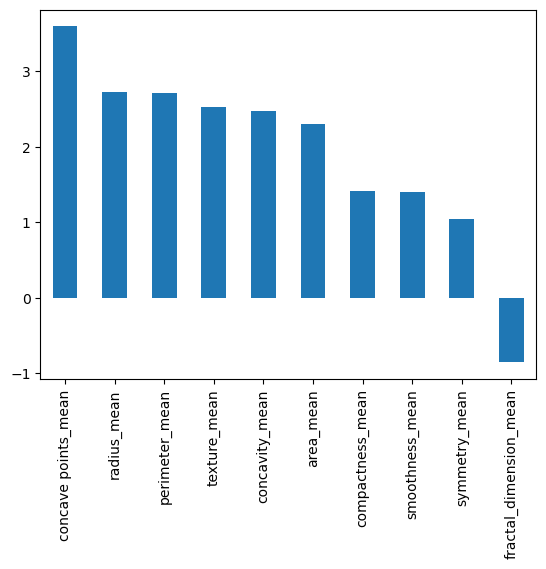

In [ ]:
#Que varible tiene mayor incidencia
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind="bar"))

Axes(0.125,0.11;0.775x0.77)


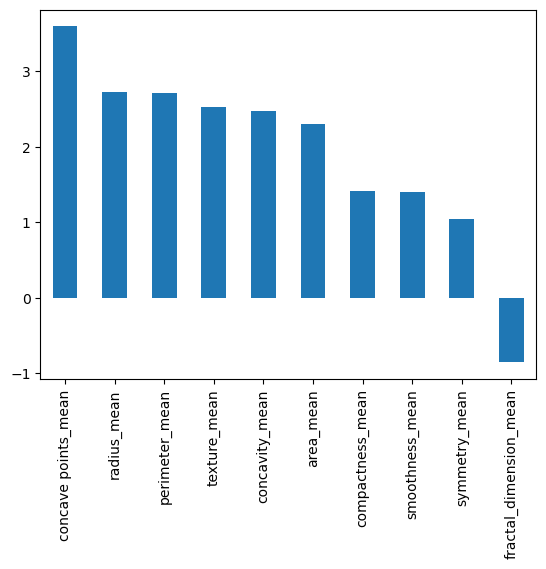

In [ ]:
#Que varible tiene menor incidencia
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[-10:].plot(kind="bar"))

### Matrix de Confución

<Figure size 1100x1100 with 0 Axes>

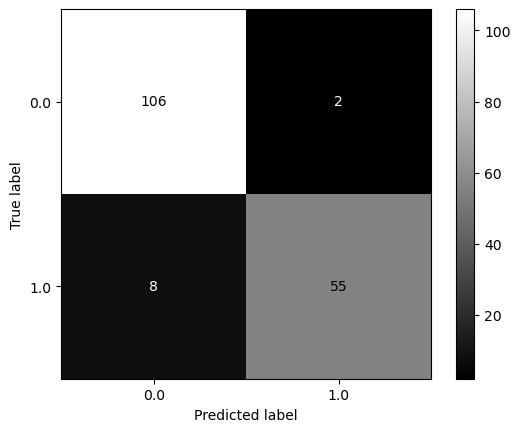

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="gray")
plt.savefig('matrix.png')
plt.show()

In [ ]:
print(y_test)

[0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0.]


In [ ]:
print(prediction_test)

[0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0.]
